<a href="https://colab.research.google.com/github/santiagorg2401/tensorflow_course_exercises/blob/main/03_introduction_to_computer_vision_with_tensorflow_BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow.

Computer vision is the practice of writing algorithms which can discover patterns in visual data.

## Create helper functions.

In [61]:
# Plot validation ans training curves separately.
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

In [62]:
# Visualize images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class, i=1):
  """
  Get a random image path, read it and plot it.
  target_dir: String. It contains the target directory where the iamges are stored.
  target_class: String. The class name of the image to plot.

  i: Integer. Number of images to retrieve.
  """
  # Setup the targer directory.
  target_folder = target_dir + target_class

  imgs = []

  for j in range(0,i):
    # Get a random image path.
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    # Read in the image and plot it.
    img  = mpimg.imread(target_folder + "/" + random_image[0])
    fig, (ax) = plt.subplots()
    ax.imshow(img)
    ax.set_title(target_class)
    ax.set_axis_off()
    print(f"Image shape: {img.shape}")
    imgs.append(img)

  plt.show()
  return img

In [155]:
def load_and_prep_img(filename, img_shape=(224,224)):
  """
  Reads an image from `filename`, turns into a tensor and reshapes it.
  """

  # Read in the image.
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor.
  img = tf.image.decode_image(img)

  # Resize the image.
  img = tf.image.resize(img, size=img_shape)

  # Rescale the image.
  img = img/255.
  return img

In [164]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Makes a prediction based on a filename and plots it.

  Keyword arguments:
  model -- TensorFlow model.
  filename -- String, contains file path to input image.
  class_names -- List, contains class names.
  """

  # Import image and preprocess it.
  img = load_and_prep_img(filename)

  # Make a prediction.
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class.
  pred_class = class_names[int(tf.round(pred))]

  # Plot image and predicted class as title.
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

## Get the data.
Reduced Food101 dataset on 2 classes.

In [ ]:
# Download dataset.
# https://github.com/mrdbourke/tensorflow-deep-learning#course-materials
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

In [ ]:
import zipfile

# Unzip.
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

## Inspect the data.

In [39]:
!ls pizza_steak/

/bin/bash: /home/santiagorg2401/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
test  train


In [40]:
!ls pizza_steak/train/

/bin/bash: /home/santiagorg2401/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
pizza  steak


In [41]:
!ls pizza_steak/train/pizza

/bin/bash: /home/santiagorg2401/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821

In [42]:
import os

# Walk thorugh the piza_steak directory and list the number of files.
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/steak'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'


In [43]:
num_steeak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steeak_images_train

750

## Visualize images by code.

In [63]:
# Get the class names programmatically.
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

['3142618.jpg']
Image shape: (512, 512, 3)
['752203.jpg']
Image shape: (512, 512, 3)


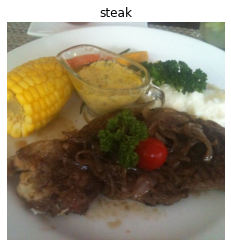

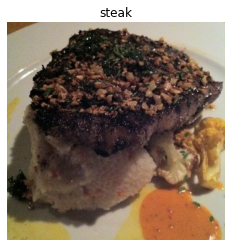

['358178.jpg']
Image shape: (384, 512, 3)
['1635386.jpg']
Image shape: (384, 512, 3)


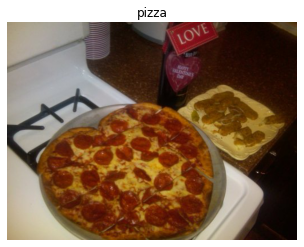

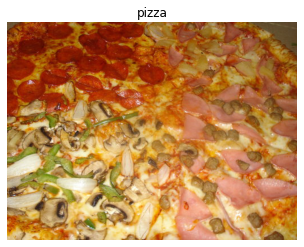

In [64]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak",
                        i=2)
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza",
                        i=2)

## Preprocess data.
* Load the images.
* Preprocess the images (normalizing and turning into batches).

Using **batches** prevents to overload the GPU memory, a batch size of 32 is highly recommended.

In [47]:
# Preprocess data by normalizing it.
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to dataset directory.
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches.
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary")

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary")
# Get a sample of a train data batch.
images, labels = train_data.next()
print(f"The batch size is {len(images)}, and there are {len(train_data)} batches.")
print(f"The image shape is {images[0].shape}.")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
The batch size is 32, and there are 47 batches.
The image shape is (224, 224, 3).


## Building `model_1`
* Build a CNN to find patterns in the images (start with a baseline i.e. from a scientific paper).
* Compile our CNN.
* Fit the CNN to the training data.
* Tune parameters and improve model.
* Repeat until metrics achieve goals.

What arquitecture to use? Get started with something simple and see if it works, introduce complexity as requiered.

In [48]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Check devices.
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

# Set random seed.
tf.random.set_seed(42)

# Build a CNN model.
model_1 = Sequential([
  Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
         kernel_size=(3, 3), # the size of the sliding window going across an input
         strides=(1, 1), # the size of the step the sliding window takes across an input 
         padding="valid", # if "same", output shape is same as input shape, if "valid", output shape gets compressed
         activation="relu",
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)                 
])

# Compile the CNN.
model_1.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the CNN.
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Num GPUs: 1
Epoch 1/5
47/47 [==============================] - 6s 122ms/step - loss: 1.1608 - accuracy: 0.6460 - val_loss: 0.4473 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4040 - accuracy: 0.8173 - val_loss: 0.3725 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 6s 120ms/step - loss: 0.3245 - accuracy: 0.8627 - val_loss: 0.3455 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 6s 121ms/step - loss: 0.2274 - accuracy: 0.9300 - val_loss: 0.3403 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 6s 121ms/step - loss: 0.1242 - accuracy: 0.9653 - val_loss: 0.3572 - val_accuracy: 0.8520


In [49]:
# Model summary.
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_31 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_32 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_9 (Flatten)         (None, 475240)            0         
                                                                 
 dense_9 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

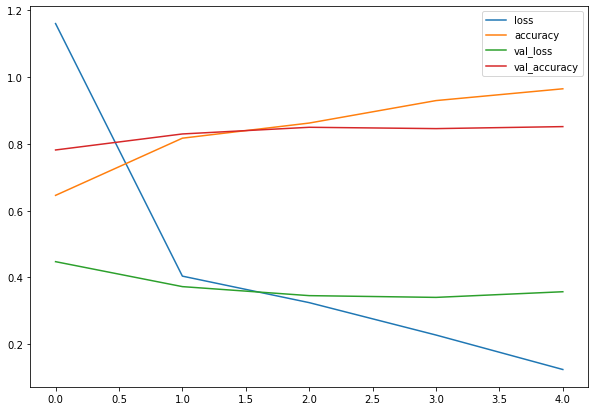

In [50]:
# Plot training curves.
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10,7))

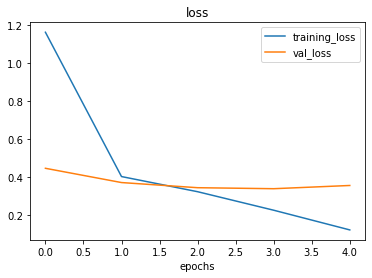

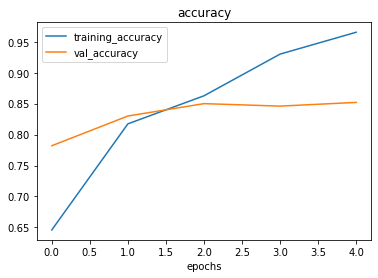

In [51]:
plot_loss_curves(history_1)

When the validation loss curve starts to increase, it's likely that the model it's overfitting.

## Using previous model from TensorFlow Playground.

In [52]:
# Set random seed.
tf.random.set_seed(42)

# Build the model.
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model.
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model.
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 120ms/step - loss: 0.7844 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 120ms/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 120ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 121ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.6932 - accuracy: 0.4853 - val_loss: 0.6931 - val_accuracy: 0.5000


In [53]:
# Get summary
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 150528)            0         
                                                                 
 dense_10 (Dense)            (None, 4)                 602116    
                                                                 
 dense_11 (Dense)            (None, 4)                 20        
                                                                 
 dense_12 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Set the random seed.
tf.random.set_seed(42)

# Create the model.
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model.
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model.
hisory_3 = model_3.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 119ms/step - loss: 2.9592 - accuracy: 0.6207 - val_loss: 0.7242 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 6s 117ms/step - loss: 0.8450 - accuracy: 0.7240 - val_loss: 0.7185 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 5s 115ms/step - loss: 0.7299 - accuracy: 0.7433 - val_loss: 0.8404 - val_accuracy: 0.7200
Epoch 4/5
47/47 [==============================] - 5s 117ms/step - loss: 0.6040 - accuracy: 0.7633 - val_loss: 0.5369 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 6s 119ms/step - loss: 0.6489 - accuracy: 0.7713 - val_loss: 1.3872 - val_accuracy: 0.6800


In [55]:
# Get summary
model_3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 150528)            0         
                                                                 
 dense_13 (Dense)            (None, 100)               15052900  
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## **Overfitting.**
Model 1 had an increase in the validation loss curve, therefore it's overfitting the dataset.

**Inducing overfitting:**
* Increase the number of convlolutional layers or filters.

**Reducing overfitting:**
* Add data augmentation.
* Add regularization layers (MaxPool2D).
* Increase dataset.

Reducing overfitting is also known as **regularization**.


## Create `model_4` to avoid overfitting.

In [56]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam

# Check pysical devices for GPU.
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

# Set random seed.
tf.random.set_seed(42)

# Create the model.
model_4 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model.
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model.
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Num GPUs: 1
Epoch 1/5
47/47 [==============================] - 6s 129ms/step - loss: 0.5991 - accuracy: 0.6753 - val_loss: 0.4969 - val_accuracy: 0.7380
Epoch 2/5
47/47 [==============================] - 6s 120ms/step - loss: 0.4583 - accuracy: 0.7900 - val_loss: 0.3780 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4131 - accuracy: 0.8140 - val_loss: 0.3417 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 6s 120ms/step - loss: 0.3882 - accuracy: 0.8273 - val_loss: 0.3263 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 6s 117ms/step - loss: 0.3728 - accuracy: 0.8420 - val_loss: 0.3131 - val_accuracy: 0.8740


In [57]:
# Get a summary.
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 10)      

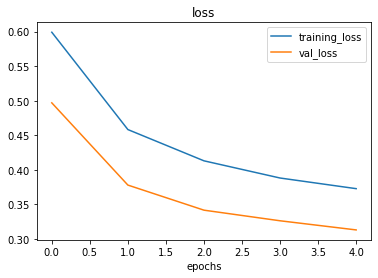

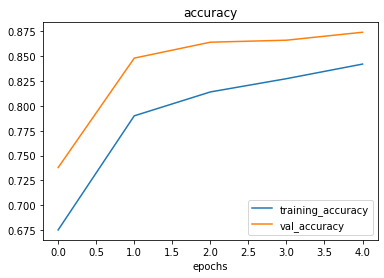

In [59]:
# Plot curves.
plot_loss_curves(history_4)

## Data augmentation.
It alters the original training dataset to have more diversity and allowing the model to learn more generalisation patterns. Original images in directory are not usually modified.

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator training instance with data augmentation.
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator training instace without data augmentation.
train_datagen = ImageDataGenerator(rescale=1/255.)

# Creaste ImageDataGenerator instance for test dataset without data augmentation.
test_datagen = ImageDataGenerator(rescale=1/255.)

# Setup paths to dataset directory.
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Set image size.
IMG_SIZE = (224, 224)

# Import data from directory.
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=IMG_SIZE,
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Text(0.5, 1.0, 'Augmented image.')

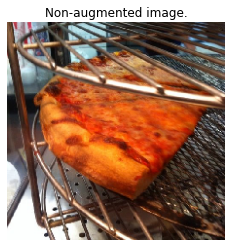

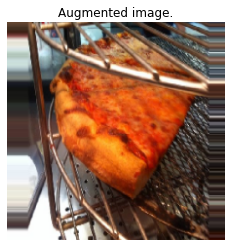

In [123]:
# Visualize augmented data.
import matplotlib.pyplot as plt
import random

img, lbl = train_data.next()
aug_img, aug_lbl = train_data_augmented.next()
i = random.randint(0, 32)

plt.imshow(img[i])
plt.title("Non-augmented image.")
plt.axis(False)
plt.figure()
plt.imshow(aug_img[i])
plt.axis(False)
plt.title("Augmente
d image.")

## Build `model_5` on augmented data.
Build it as model_4 but trained with augmented data.

In [126]:
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Set seed.
tf.random.set_seed(42)

# Build model_5.
model_5 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile model_5.
model_5.compile(loss=['binary_crossentropy'],
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit model_5
history_5 = model_5.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 299ms/step - loss: 0.7388 - accuracy: 0.4373 - val_loss: 0.6829 - val_accuracy: 0.5540
Epoch 2/5
47/47 [==============================] - 14s 293ms/step - loss: 0.7042 - accuracy: 0.4193 - val_loss: 0.6918 - val_accuracy: 0.5900
Epoch 3/5
47/47 [==============================] - 14s 290ms/step - loss: 0.6914 - accuracy: 0.5307 - val_loss: 0.6801 - val_accuracy: 0.6780
Epoch 4/5
47/47 [==============================] - 14s 290ms/step - loss: 0.6915 - accuracy: 0.4840 - val_loss: 0.6727 - val_accuracy: 0.6880
Epoch 5/5
47/47 [==============================] - 14s 288ms/step - loss: 0.6880 - accuracy: 0.5673 - val_loss: 0.6625 - val_accuracy: 0.5000


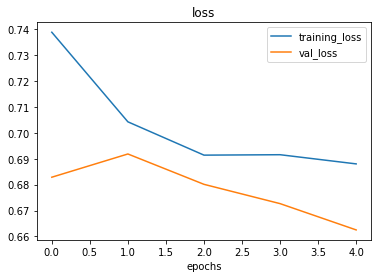

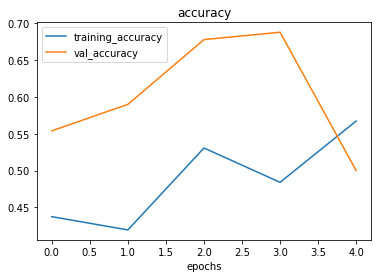

In [127]:
plot_loss_curves(history_5)

## Build `model_6` with shuffled augmented data.

**Import data and augment it.**

In [130]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator training instance with data augmentation.
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Creaste ImageDataGenerator instance for test dataset without data augmentation.
test_datagen = ImageDataGenerator(rescale=1/255.)

# Setup paths to dataset directory.
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Set image size.
IMG_SIZE = (224, 224)

# Import data from directory.
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=IMG_SIZE,
                                                                   batch_size=32,
                                                                   class_mode='binary')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


**Build and train model.**

In [131]:
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential

# Set seed.
tf.random.set_seed(42)

# Build model_6.
model_6 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile model_6.
model_6.compile(loss=['binary_crossentropy'],
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit model_5
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 299ms/step - loss: 0.6539 - accuracy: 0.6127 - val_loss: 0.5028 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 14s 290ms/step - loss: 0.5430 - accuracy: 0.7340 - val_loss: 0.4279 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 14s 291ms/step - loss: 0.5112 - accuracy: 0.7460 - val_loss: 0.4066 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 14s 295ms/step - loss: 0.4899 - accuracy: 0.7600 - val_loss: 0.3762 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 14s 291ms/step - loss: 0.4888 - accuracy: 0.7613 - val_loss: 0.3700 - val_accuracy: 0.8380


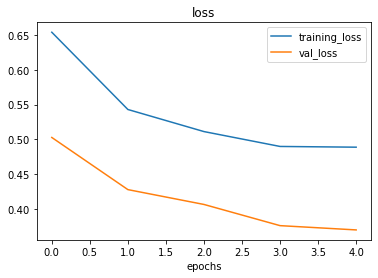

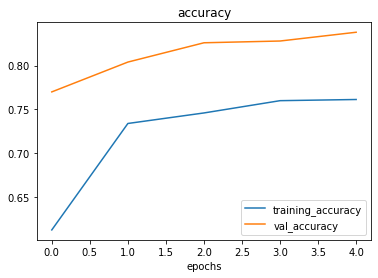

In [132]:
plot_loss_curves(history_6)

## Build `model_7` with the CNN explainer architecture and trained on augmented data.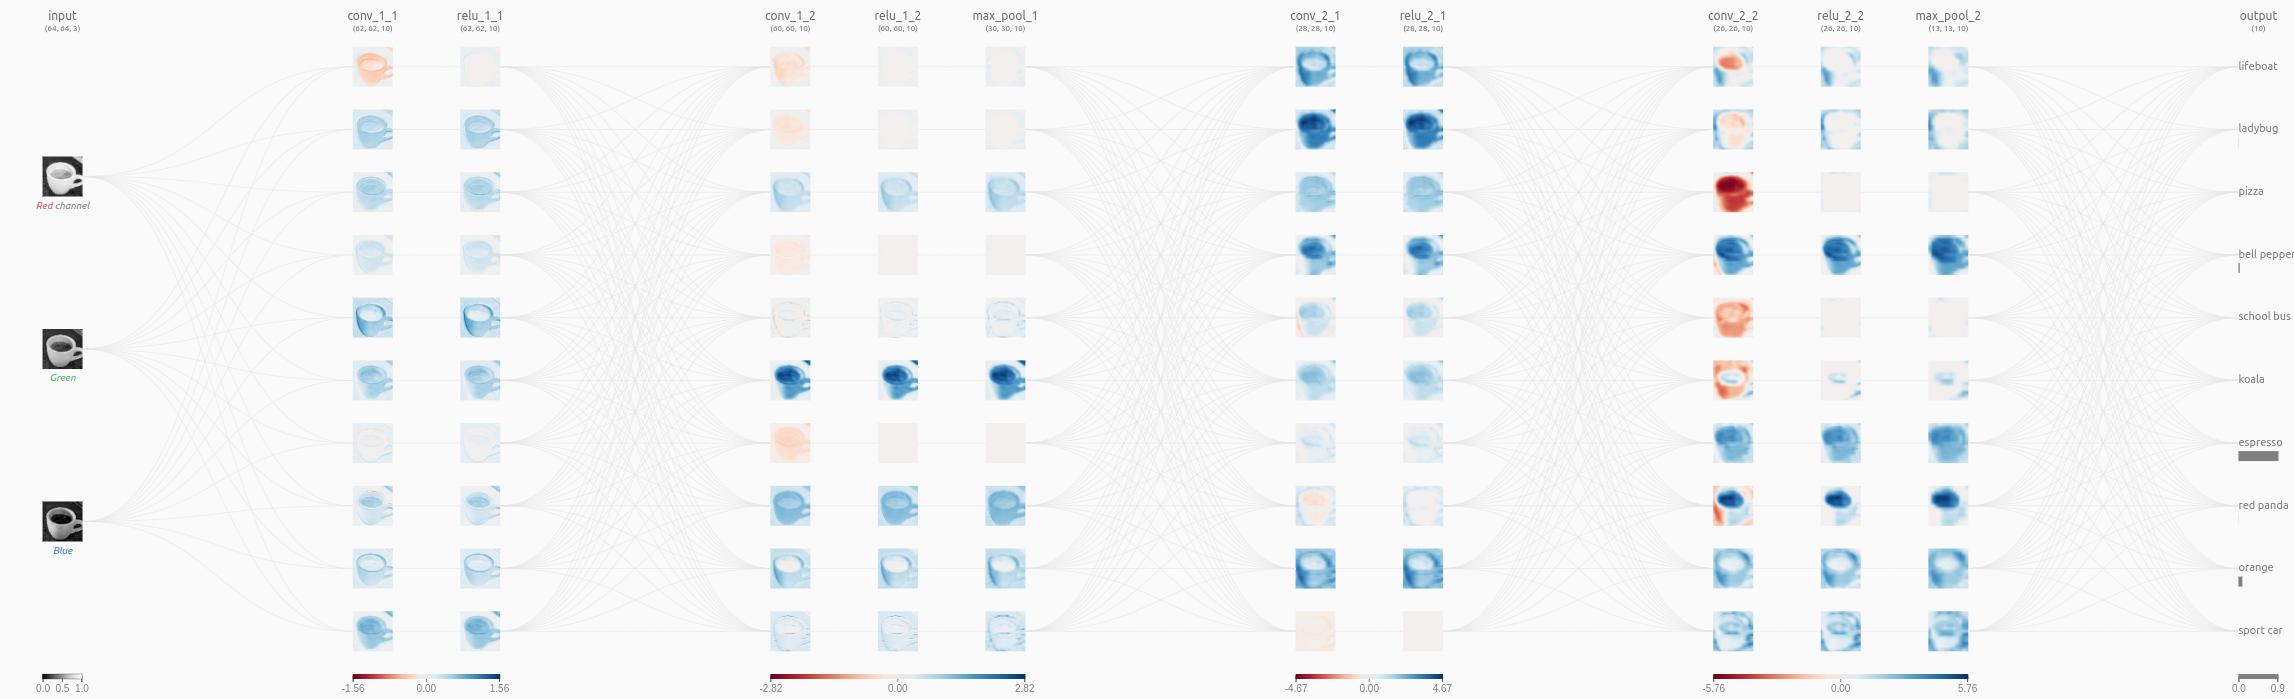

In [135]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator training instance with data augmentation.
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Creaste ImageDataGenerator instance for test dataset without data augmentation.
test_datagen = ImageDataGenerator(rescale=1/255.)

# Setup paths to dataset directory.
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Set image size.
IMG_SIZE = (224, 224)

# Import data from directory.
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=IMG_SIZE,
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   seed=24)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode='binary',
                                             seed=24)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [144]:
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential

# Set seed.
tf.random.set_seed(24)

# Build model_7 (Baseline: CNN Explainer).
model_7 = Sequential([
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile model_7.
model_7.compile(loss=['binary_crossentropy'],
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit model_7.
history_7 =  model_7.fit(train_data_augmented,
                         epochs=20,
                         steps_per_epoch=len(train_data_augmented),
                         validation_data=test_data,
                         validation_steps=len(test_data))

Epoch 1/20
47/47 [==============================] - 14s 295ms/step - loss: 0.6337 - accuracy: 0.6533 - val_loss: 0.5487 - val_accuracy: 0.6900
Epoch 2/20
47/47 [==============================] - 13s 280ms/step - loss: 0.5320 - accuracy: 0.7453 - val_loss: 0.4093 - val_accuracy: 0.8060
Epoch 3/20
47/47 [==============================] - 14s 287ms/step - loss: 0.5118 - accuracy: 0.7513 - val_loss: 0.3714 - val_accuracy: 0.8560
Epoch 4/20
47/47 [==============================] - 13s 281ms/step - loss: 0.4797 - accuracy: 0.7860 - val_loss: 0.3612 - val_accuracy: 0.8540
Epoch 5/20
47/47 [==============================] - 13s 286ms/step - loss: 0.4523 - accuracy: 0.7900 - val_loss: 0.4082 - val_accuracy: 0.8120
Epoch 6/20
47/47 [==============================] - 13s 282ms/step - loss: 0.4559 - accuracy: 0.7900 - val_loss: 0.3678 - val_accuracy: 0.8480
Epoch 7/20
47/47 [==============================] - 13s 286ms/step - loss: 0.4521 - accuracy: 0.7867 - val_loss: 0.3494 - val_accuracy: 0.8660

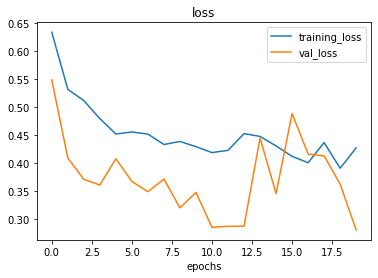

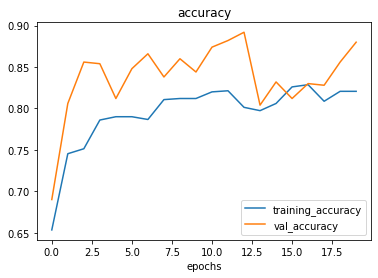

In [145]:
plot_loss_curves(history_7)

## Making predictions.
Even the new data needs to be preprocessed into the same format as the train data.

In [146]:
# Classes.
print(class_names)

['pizza' 'steak']


In [ ]:
# Download image.
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

1/1 [==============================] - 0s 13ms/step


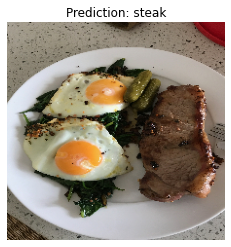

In [167]:
# Use helper function to make a prediction and plot it.
pred_and_plot(model_7, "03-steak.jpeg")

1/1 [==============================] - 0s 19ms/step


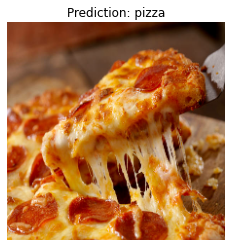

In [170]:
# Get another image and make a prediction.
pred_and_plot(model_7, "pizza.jpg")

1/1 [==============================] - 0s 17ms/step


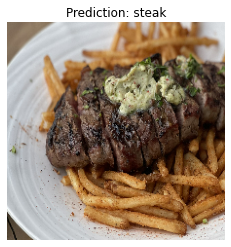

In [172]:
# The last one just because it's satisfying.
pred_and_plot(model_7, "steak.jpg")